### Q.1. Write python code from scratch for simple Linear Regression problem, the ###following training data are given.
###      X = [2,  2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
###      Y = [5.1, 6.1, 6.9, 7.8, 9.2, 9.9, 11.5, 12, 12.8]
### The model Y as a linear function of X 
### (a) Use batch gradient descent learning algorithm to learn model parameters for α = 0.01 choose random values of weights and bias and epochs=1000.  Use MSE as loss function with an appropriate convergence criterion. 
### (b) Plot cost function (J) for the learning duration 
### (c) plot the regression line  
### (d) repeat (b) to (c) for stochastic gradient descent  and Adam optimization algorithm 
### (e) Plot comparative loss curve


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

from losses import MSE 

plt.style.use("ggplot") 
%matplotlib inline 

In [2]:
inputs = np.array([2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6])
inputs = np.expand_dims(inputs, -1) 
X = np.append(np.ones(inputs.shape), inputs, axis = 1)           #We are adding a row of ones to represent the "bias" of the model. 
Y = np.array([5.1, 6.1, 6.9, 7.8, 9.2, 9.9, 11.5, 12, 12.8])
Y = np.expand_dims(Y, -1)

lr = 0.01
epochs = 1000

W = np.random.randn(2, 1)         #Dimension 2 to accomodate both weight and bias 

In [3]:
Y

array([[ 5.1],
       [ 6.1],
       [ 6.9],
       [ 7.8],
       [ 9.2],
       [ 9.9],
       [11.5],
       [12. ],
       [12.8]])

In [4]:
X.dot(W)

array([[-2.75842905],
       [-3.31850355],
       [-3.87857804],
       [-4.43865254],
       [-4.99872704],
       [-5.55880154],
       [-6.11887604],
       [-6.67895053],
       [-7.23902503]])

In [5]:
def gradient_descent(X, Y, W, lr):
    Y_hat = X.dot(W) 
    J = MSE(Y, Y_hat)
    n = len(X) 
    dW = (2/n)*X.T.dot(Y - Y_hat)

    W += lr*dW 
    return W, J

In [6]:
lossHist_gradient_descent = [] 
weightHist_gradient_descent = []
for epoch in range(epochs): 
    W, J = gradient_descent(X, Y, W, lr) 
    lossHist_gradient_descent.append(J) 
    weightHist_gradient_descent.append(W.copy())

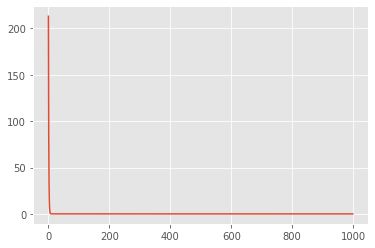

In [7]:
plt.plot(lossHist_gradient_descent)

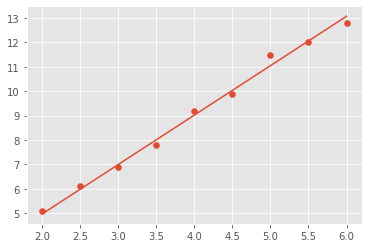

In [8]:
plt.scatter(inputs, Y) 
plt.plot(inputs, X.dot(W)) 
plt.show()

In [9]:
def stochastic_gradient_descent(X, Y, W, lr): 
    n = len(X) 
    shuffle_n = np.random.permutation(n)
    dW = np.zeros(W.shape) 

    for i in shuffle_n: 
        x = np.expand_dims(X[i].copy(), -1)
        y_hat = x.T.dot(W)    
        dW = -x.dot(Y[i] - y_hat)*2/n
        W -= lr*dW

    J = MSE(Y, X.dot(W))
    # n = len(X) 
    return W, J

In [10]:
W_sgd = np.random.randn(2, 1)
lossHist_sgd = [] 
weightHist_sgd = []
for epoch in range(epochs): 
    W_sgd, J = stochastic_gradient_descent(X, Y, W_sgd, lr) 
    lossHist_sgd.append(J) 
    weightHist_sgd.append(W_sgd.copy())

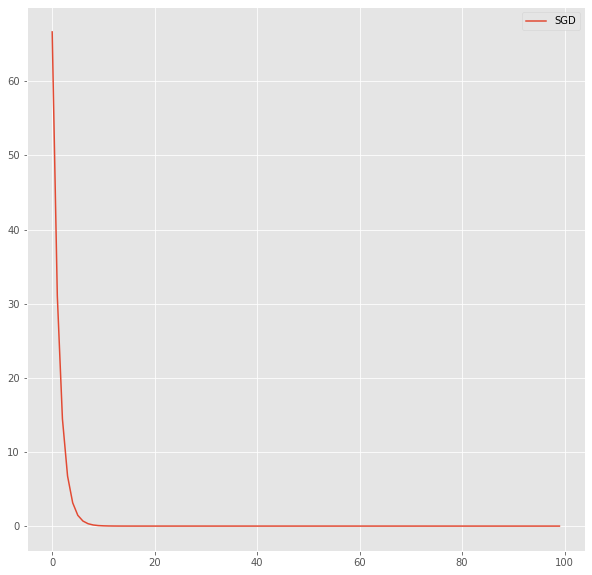

In [12]:
plt.figure(figsize = (10, 10))
plt.plot(lossHist_sgd[:100], label = "SGD")
plt.plot(lossHist_gradient_descent[:100], label = "GD")
plt.legend()
plt.show()